In [172]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [173]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.preprocessing import OrdinalEncoder

In [174]:
df = pd.read_csv(r"E:\Yashu\Yasmeen\Yashu Files\Machine Learning\Data sets\ass 14 Message_Data_Spam.csv",encoding='Latin-1')

In [175]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [176]:
df.shape

(5572, 2)

# Renaming of columns

In [177]:
df.rename(columns={'v1':'Target','v2':'Message'}, inplace = True)

In [178]:
df.head()

,Target,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [179]:
df['Target']=df['Target'].replace({'ham':0,'spam':1})

In [180]:
df.head()

,Target,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


# Statistical summary of data

In [181]:
df.describe(include = 'all')

,Target,Message
count,5572.000000,5572
unique,NaN,5169
top,NaN,"Sorry, I'll call later"
freq,NaN,30
mean,0.134063,NaN
std,0.340751,NaN
min,0.000000,NaN
25%,0.000000,NaN
50%,0.000000,NaN
75%,0.000000,NaN


# Checking for Null values

In [182]:
df.isnull().sum()

Target     0
Message    0
dtype: int64

# Count of Ham and Spam Messages

C:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Target', ylabel='count'>

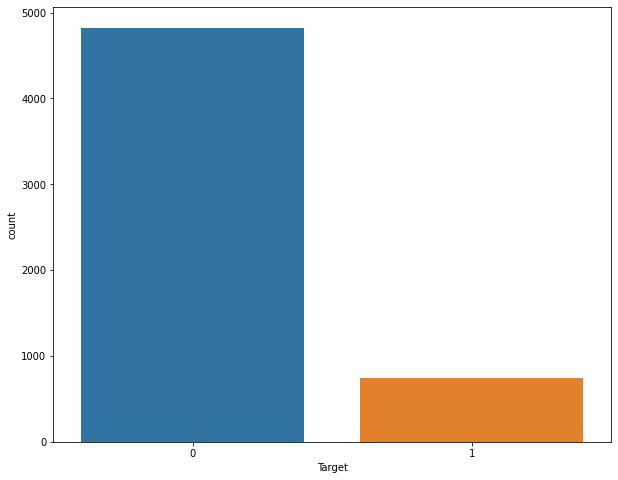

In [189]:
plt.figure(figsize=(10,8))
sns.countplot(df['Target'])

# count of words in each Message

In [190]:
df['words']=df['Message'].apply(lambda x: len(x.split(' ')))

In [191]:
df.head()

,Target,Message,words
0,0,"Go until jurong point, crazy.. Available only ...",20
1,0,Ok lar... Joking wif u oni...,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28
3,0,U dun say so early hor... U c already then say...,11
4,0,"Nah I don't think he goes to usf, he lives aro...",13


In [192]:
# Lower case

In [193]:
df['Message']=df['Message'].apply(lambda x: x.lower())

In [194]:
df.head()

,Target,Message,words
0,0,"go until jurong point, crazy.. available only ...",20
1,0,ok lar... joking wif u oni...,6
2,1,free entry in 2 a wkly comp to win fa cup fina...,28
3,0,u dun say so early hor... u c already then say...,11
4,0,"nah i don't think he goes to usf, he lives aro...",13


# Extract only alphabates and numbers using Regex

In [195]:
import re

In [196]:
a=df['Message'][0]
a

'go until jurong point, crazy.. available only in bugis n great world la e buffet... cine there got amore wat...'

In [197]:
re.sub("[^a-z0-9\s]",'',a)

'go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat'

In [198]:
df['Message']=df['Message'].apply(lambda x: re.sub("[^a-z0-9\s]",'',x))

In [199]:
df.head()

,Target,Message,words
0,0,go until jurong point crazy available only in ...,20
1,0,ok lar joking wif u oni,6
2,1,free entry in 2 a wkly comp to win fa cup fina...,28
3,0,u dun say so early hor u c already then say,11
4,0,nah i dont think he goes to usf he lives aroun...,13


# Remove stopwords

In [200]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dell6\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [201]:
stop = stopwords.words('english')
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [202]:
a=df['Message'][0]
a

'go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat'

In [203]:
''.join([i for i in a if i not in stop])

'g unl jurng pn crz vlble nl n bug n gre wrl l e buffe cne here g re w'

In [204]:
df['Message']=df['Message'].apply(lambda x: ''.join([i for i in x if i not in stop]))
df.head()

,Target,Message,words
0,0,g unl jurng pn crz vlble nl n bug n gre wrl l ...,20
1,0,k lr jkng wf u n,6
2,1,free enr n 2 wkl cp wn f cup fnl k 21 2005 ...,28
3,0,u un erl hr u c lre hen,11
4,0,nh n hnk he ge uf he lve run here hugh,13


# Remove word stems using PorterStemmer

In [205]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [206]:
ps.stem('played','playing')

'play'

In [207]:
df['Message']=df['Message'].apply(lambda x: ' '.join(ps.stem(i) for i in x.split()))

In [208]:
df.head()

,Target,Message,words
0,0,g unl jurng pn crz vlble nl n bug n gre wrl l ...,20
1,0,k lr jkng wf u n,6
2,1,free enr n 2 wkl cp wn f cup fnl k 21 2005 ex ...,28
3,0,u un erl hr u c lre hen,11
4,0,nh n hnk he ge uf he lve run here hugh,13


# Using Lemmatization

In [209]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dell6\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [210]:
lem = WordNetLemmatizer()

In [211]:
df['Message']=df['Message'].apply(lambda x: ' '.join([lem.lemmatize(i, pos ='v') for i in x.split()]))

In [212]:
df.head()

,Target,Message,words
0,0,g unl jurng pn crz vlble nl n bug n gre wrl l ...,20
1,0,k lr jkng wf u n,6
2,1,free enr n 2 wkl cp wn f cup fnl k 21 2005 ex ...,28
3,0,u un erl hr u c lre hen,11
4,0,nh n hnk he ge uf he lve run here hugh,13


# Count Vector

In [213]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [214]:
x = df['Message']
y = df['Target']

In [215]:
x_train, x_test, y_train, y_test = train_test_split(x,y ,test_size= 0.3, random_state = 10)

In [216]:
x_train_cv = cv.fit_transform(x_train)
x_test_cv = cv.transform(x_test)

In [217]:
models = {'LogisticRegression' : LogisticRegression(random_state=10),
         'DecisionTreeClassifier' : DecisionTreeClassifier(random_state=101),
         'RandomForestClassifier' : RandomForestClassifier(random_state=1001)}

LogisticRegression
Accuracy Score:- 0.98
roc-auc score:- 0.9293412404068593
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1446
           1       0.97      0.86      0.91       226

    accuracy                           0.98      1672
   macro avg       0.97      0.93      0.95      1672
weighted avg       0.98      0.98      0.98      1672



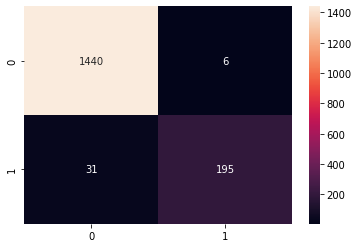

True Negative- 1440
False Positive- 1440
False Negative- 31
True Positive- 195
************************************************************************************************************ 

DecisionTreeClassifier
Accuracy Score:- 0.95
roc-auc score:- 0.8814948775382808
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1446
           1       0.81      0.79      0.80       226

    accuracy                           0.95      1672
   macro avg       0.89      0.88      0.89      1672
weighted avg       0.95      0.95      0.95      1672



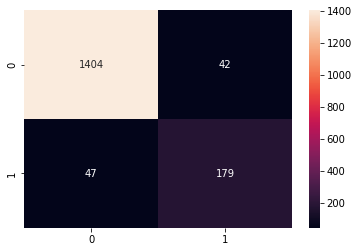

True Negative- 1404
False Positive- 1404
False Negative- 47
True Positive- 179
************************************************************************************************************ 

RandomForestClassifier
Accuracy Score:- 0.97
roc-auc score:- 0.8805309734513274
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1446
           1       1.00      0.76      0.86       226

    accuracy                           0.97      1672
   macro avg       0.98      0.88      0.92      1672
weighted avg       0.97      0.97      0.97      1672



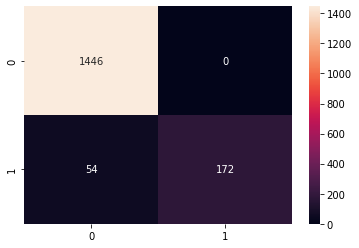

True Negative- 1446
False Positive- 1446
False Negative- 54
True Positive- 172
************************************************************************************************************ 



In [219]:
for name, model in models.items():
    model.fit(x_train_cv, y_train)
    
    y_pred = model.predict(x_test_cv)
    
    print(name)
    print('Accuracy Score:-', round(metrics.accuracy_score(y_test, y_pred),2))
    print('roc-auc score:-', metrics.roc_auc_score(y_test, y_pred))
    print(metrics.classification_report(y_test, y_pred))
    sns.heatmap(metrics.confusion_matrix(y_test, y_pred),annot = True,fmt='g')
    plt.show()
    tn, fp, fn, tp=metrics.confusion_matrix(y_test, y_pred).ravel()
    print("True Negative-" , tn)
    print("False Positive-" , tn)
    print("False Negative-" , fn)
    print("True Positive-" , tp)
    print("************************************************************************************************************",'\n')